## 1. loading libraries and dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler

In [2]:
# loading data
dataset=pd.read_csv(r'../input/wine-quality-dataset/WineQT.csv')

In [3]:
data=dataset.copy()

## 2. EDA

## 2.a) Feature exploring

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
data.shape

(1143, 13)

In [7]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [8]:
# checking for null values in data
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<AxesSubplot:>

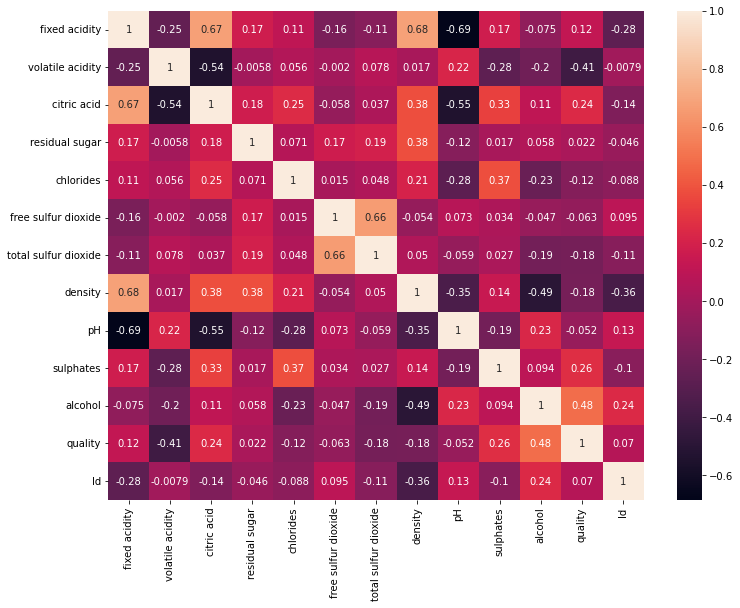

In [9]:
# checking correlation
corr=data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True,)

In [10]:
# making series for target variable
target=dataset['quality']
target.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [11]:
data=data.drop(['Id','quality'],axis=1)

## 2.b) Balancing dataset

<AxesSubplot:ylabel='quality'>

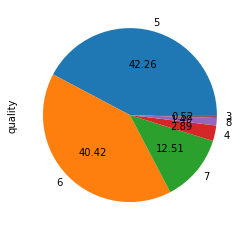

In [12]:
# checking if dataset is balanced 
target.value_counts().plot.pie(autopct='%.2f')

In [13]:
# since dataset is inbalanced, using over sampling to balance dataset
ros=RandomOverSampler(sampling_strategy='not majority')
X_ros,y_ros=ros.fit_resample(data,target)

(2898,)


<AxesSubplot:ylabel='quality'>

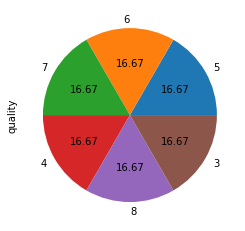

In [14]:
print(y_ros.shape)
y_ros.value_counts().plot.pie(autopct='%.2f')

In [15]:
X_ros.shape

(2898, 11)

## 2.c) Plotting features

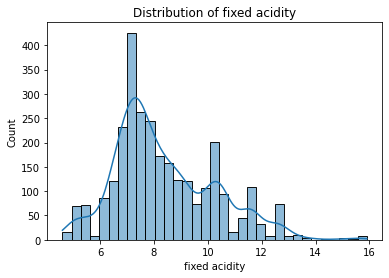

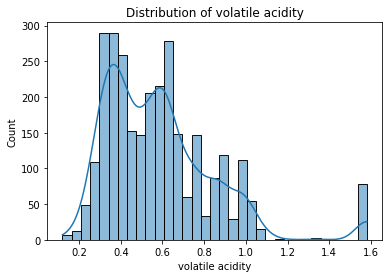

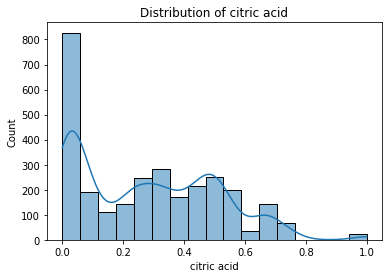

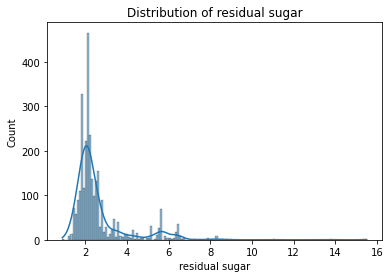

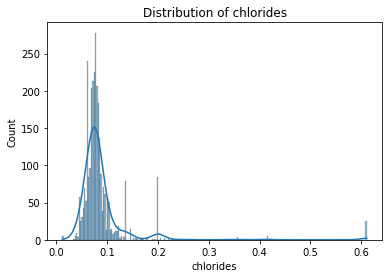

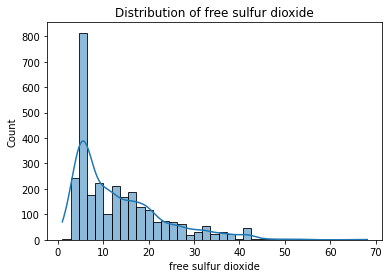

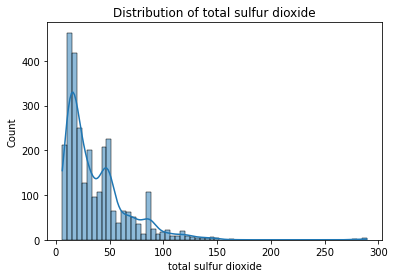

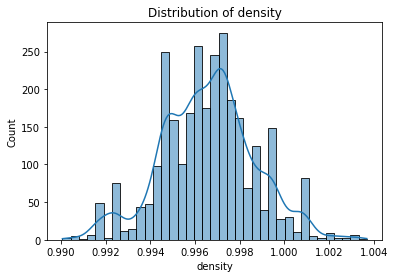

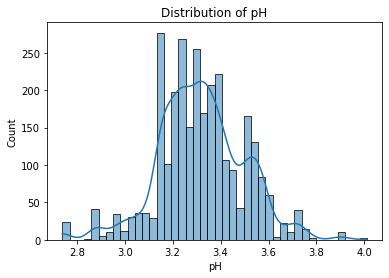

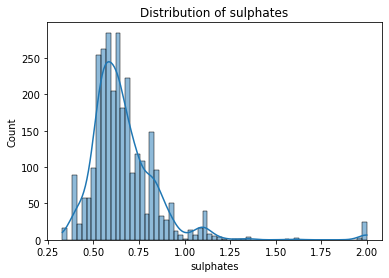

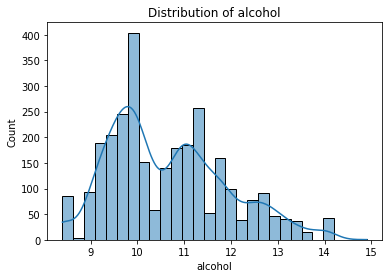

In [16]:
# plotting features 
for col in X_ros.columns:
    sns.histplot(X_ros[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()
    

## 3. Train-Test split and feature scaling


In [17]:
# splitting dataset into train and test 
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X_ros,y_ros,random_state=0,test_size=.2)


In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(train_X,train_y)
scaler.transform(test_X)

array([[-1.48337965,  0.12489991, -1.09472531, ...,  1.93855057,
        -0.22593246, -0.43490076],
       [-0.04258881, -1.08079711,  0.92392355, ..., -0.27441095,
        -0.12303209,  1.15132596],
       [-0.89639079,  0.33212909, -0.91919063, ...,  0.17952988,
        -0.63753395, -0.43490076],
       ...,
       [-0.41612717,  3.74199099, -1.22637633, ...,  1.03066892,
        -1.35783656,  0.19958993],
       [ 0.81121317, -0.89240695,  0.57285419, ..., -0.61486657,
        -0.84333469, -0.91076877],
       [-1.21656653, -0.10116828, -1.22637633, ...,  1.54135235,
        -0.63753395,  0.67545795]])

## 4. Model Building & validation 

In [19]:
# using random forest to build model
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=200,random_state=0)
rfc_model.fit(train_X,train_y)


RandomForestClassifier(n_estimators=200, random_state=0)

In [20]:
# validation of test data using random forest model
from sklearn.metrics import accuracy_score,f1_score

rfc_pred=rfc_model.predict(test_X)
print(f'Accuracy score is {accuracy_score(rfc_pred,test_y)}')

rfc_f1score=f1_score(rfc_pred,test_y,average='weighted')
print(f'F1 Score: {rfc_f1score}')

Accuracy score is 0.8862068965517241
F1 Score: 0.8902110598234613


In [21]:
# using xgboost for model building 
from xgboost import XGBClassifier
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_model.fit(train_X,train_y)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
# validation of test data using xgboost

xgb_pred=xgb_model.predict(test_X)
print(f'Accuracy score is {accuracy_score(xgb_pred,test_y)}')
xgb_f1score=f1_score(xgb_pred,test_y,average='weighted')
print(f'F1 Score: {xgb_f1score}')

Accuracy score is 0.8879310344827587
F1 Score: 0.8905085836329153


In [23]:
# building model using lightgbm

import lightgbm as lgb

lgb_model=lgb.LGBMClassifier(n_estimators=200,boosting='dart',num_leaves=80,max_depth=40,min_data_in_leaf=10,
                            num_threads=4,learning_rate=.35 ,random_state=0)

lgb_model.fit(train_X,train_y)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4


LGBMClassifier(boosting='dart', learning_rate=0.35, max_depth=40,
               min_data_in_leaf=10, n_estimators=200, num_leaves=80,
               num_threads=4, random_state=0)

In [24]:
# validation of test data using lightgbm model

lgb_pred=lgb_model.predict(test_X)
print(f'Accuracy score is {accuracy_score(lgb_pred,test_y)}')
lgb_f1score=f1_score(lgb_pred,test_y,average='weighted')
print(f'F1 Score: {lgb_f1score}')

Accuracy score is 0.8862068965517241
F1 Score: 0.8896137288556215


<AxesSubplot:title={'center':'Countplot of test quality'}, xlabel='count', ylabel='quality'>

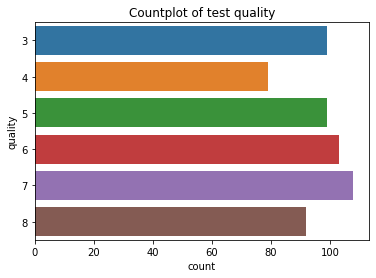

In [25]:
# Plotting test indepedent variable & predicted results

plt.title('Countplot of test quality')
sns.countplot(y=test_y)

<AxesSubplot:title={'center':'Countplot of predicated quality with random forest'}, xlabel='count'>

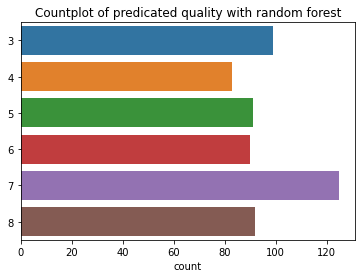

In [26]:
# with random forest 
plt.title('Countplot of predicated quality with random forest')
sns.countplot(y=rfc_pred)

<AxesSubplot:title={'center':'Countplot of predicated quality with xgboost'}, xlabel='count'>

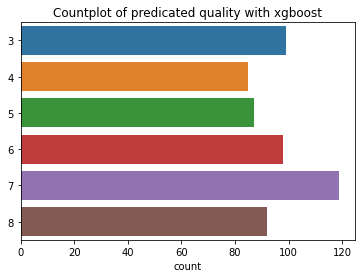

In [27]:
# with xgboost
plt.title('Countplot of predicated quality with xgboost')
sns.countplot(y=xgb_pred)

<AxesSubplot:title={'center':'Countplot of predicated quality with lightgbm'}, xlabel='count'>

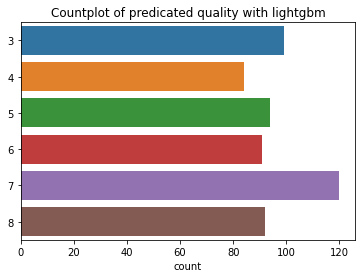

In [28]:
# with lightgbm
plt.title('Countplot of predicated quality with lightgbm')
sns.countplot(y=lgb_pred)
